In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["red", "green", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
plt.rcParams['figure.figsize'] = 12, 8

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Datasets/Datasets/bbc-text.csv')

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.category.value_counts(sort = True)

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
# missing values
df.isnull().sum()

category    0
text        0
dtype: int64

In [8]:
# check for duplicate values
df.duplicated().sum()

99

In [9]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [10]:
# check for duplicate values
df.duplicated().sum()

0

In [11]:
df.shape

(2126, 2)

In [12]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [13]:
category_dict = {'sport':0, 'business':1, 'politics':2, 'tech':3, 'entertainment':4}
df['label'] = df['category'].map(category_dict)
df.sample(10)

,category,text,label
859,tech,finding new homes for old phones re-using old ...,3
717,politics,child access laws shake-up parents who refuse ...,2
1812,business,fannie mae should restate books us mortgage ...,1
1990,politics,tories opposing 24-hour drinking the tories sa...,2
2044,politics,kennedy begins pre-election tour liberal democ...,2
736,sport,o sullivan keeps his powder dry when you are g...,0
2188,sport,mexicans tracking unhappy juninho mexican outf...,0
401,tech,progress on new internet domains by early 2005...,3
5,politics,howard hits back at mongrel jibe michael howar...,2
1306,entertainment,us afflicted with awards fatigue the film wo...,4


In [14]:
df.category.value_counts(sort = True)

category
sport            504
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

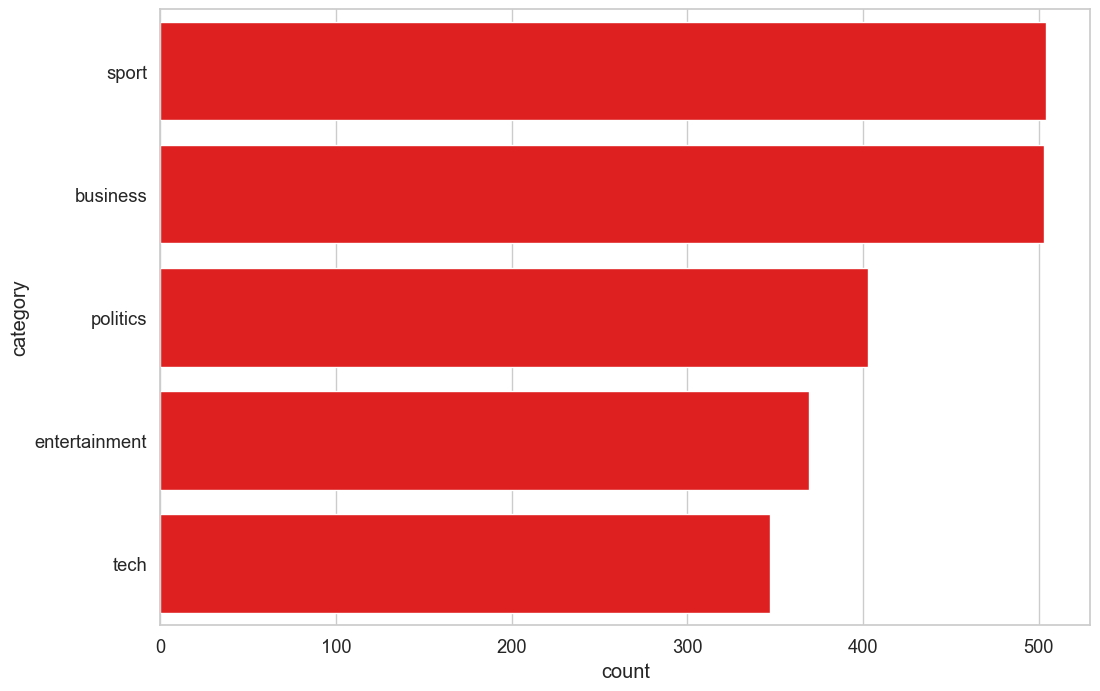

In [15]:
sns.countplot(df['category'],order = df['category'].value_counts(normalize=True).index)

In [16]:
df['text_length'] = df['text'].astype(str).apply(len)
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [17]:
df

,category,text,label,text_length,text_word_count
0,tech,tv future in the hands of viewers with home th...,3,4333,737
1,business,worldcom boss left books alone former worldc...,1,1842,300
2,sport,tigers wary of farrell gamble leicester say ...,0,1342,246
3,sport,yeading face newcastle in fa cup premiership s...,0,2176,341
4,entertainment,ocean s twelve raids box office ocean s twelve...,4,1579,260
...,...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1,1745,293
2221,politics,kilroy unveils immigration policy ex-chatshow ...,2,955,156
2222,entertainment,rem announce new glasgow concert us band rem h...,4,1648,301
2223,politics,how political squabbles snowball it s become c...,2,4684,858


In [18]:
df['label'].value_counts()

label
0    504
1    503
2    403
4    369
3    347
Name: count, dtype: int64

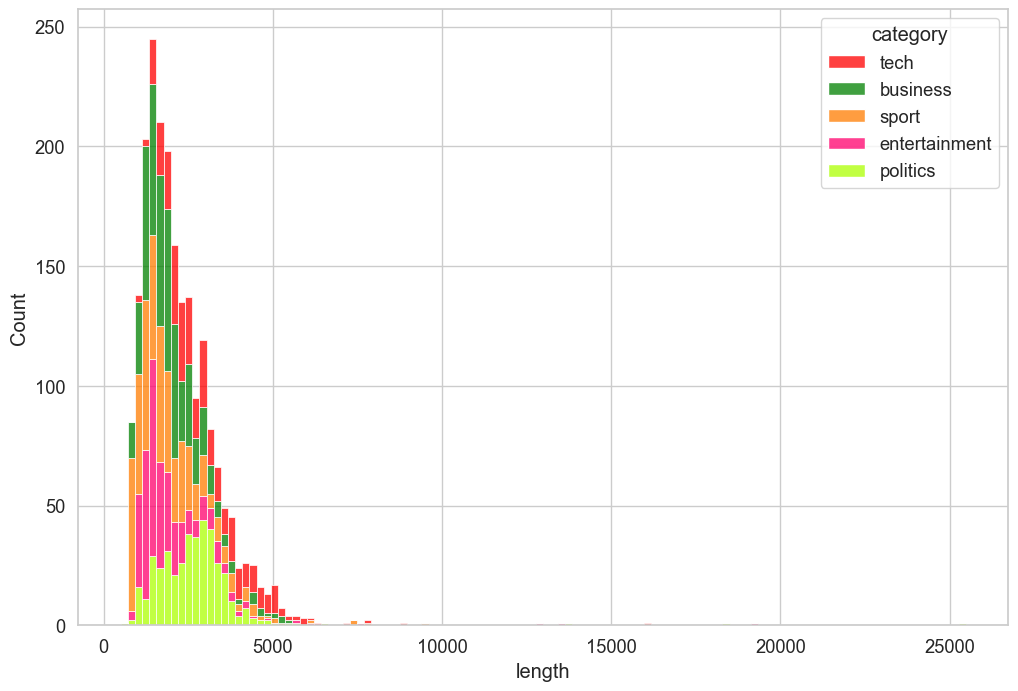

In [19]:
# data distribution
df2 = df.copy()
df2['length'] = [len(x) for x in df2['text']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='category', multiple='stack')

plt.show()

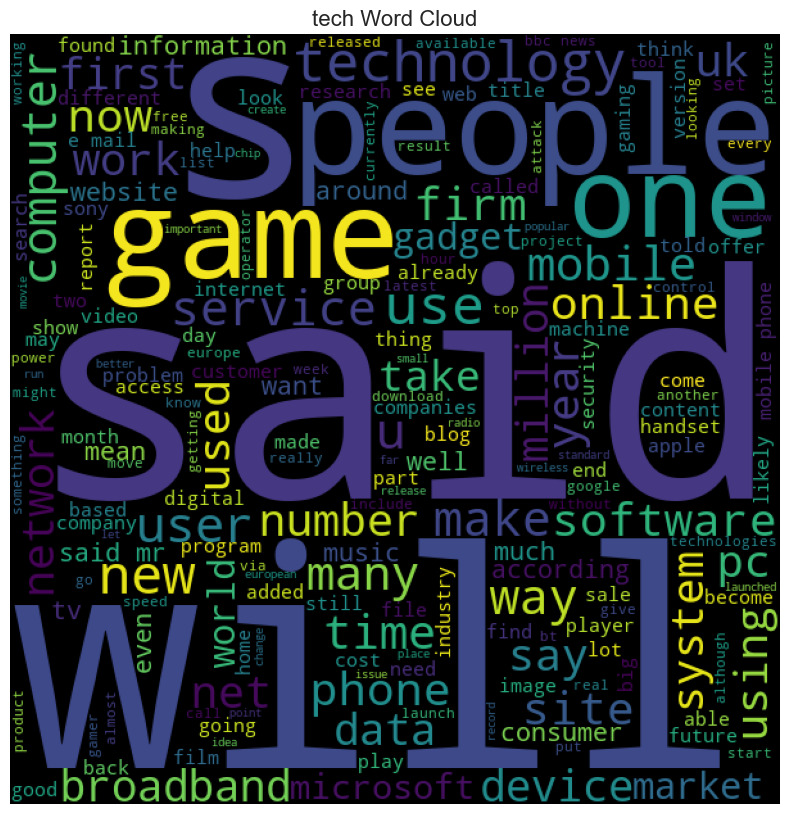

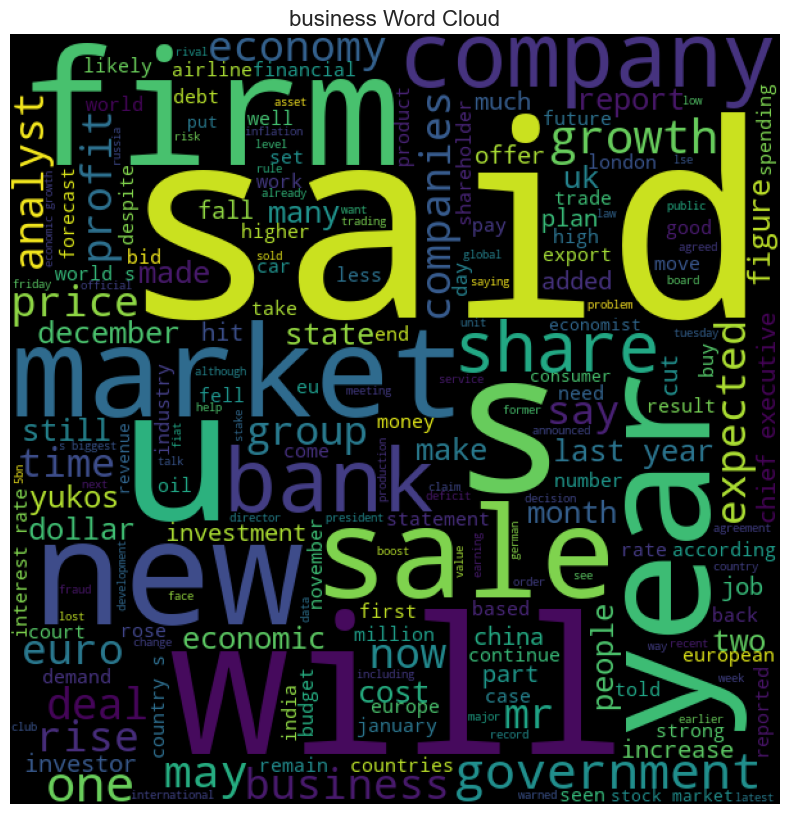

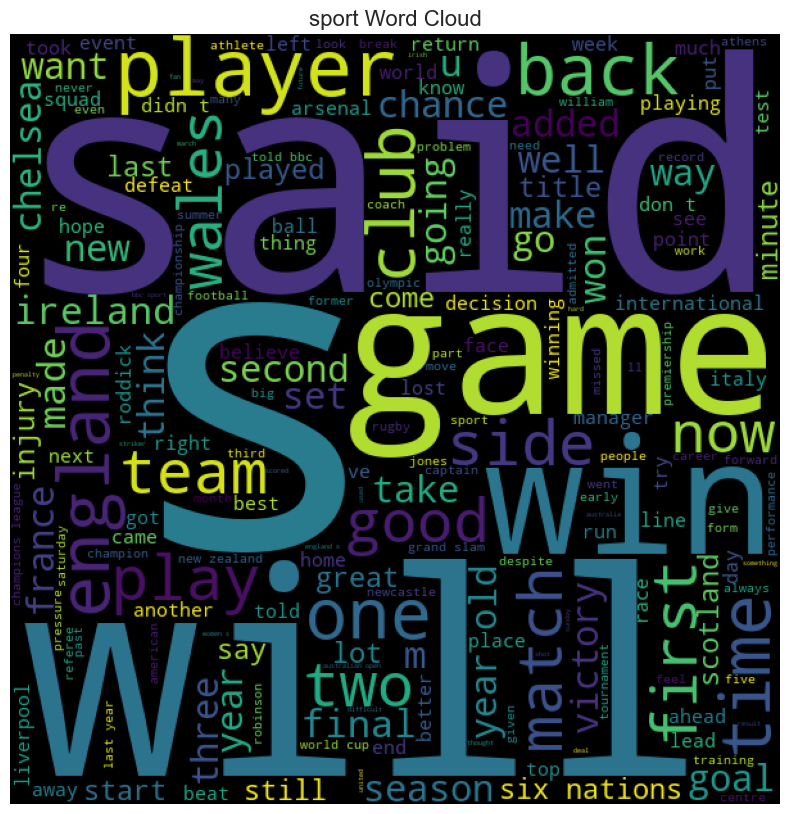

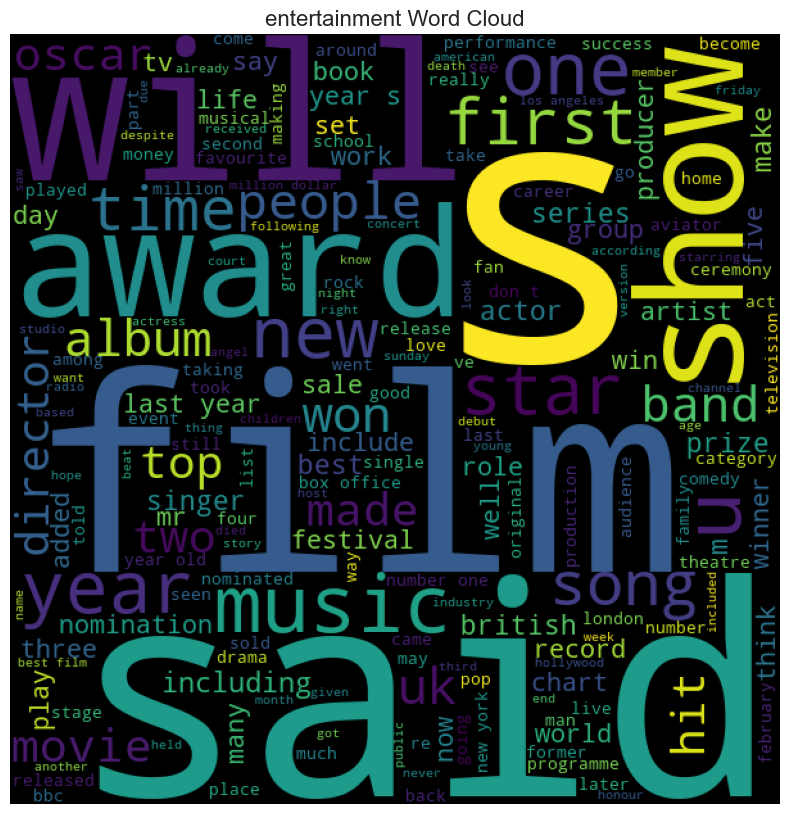

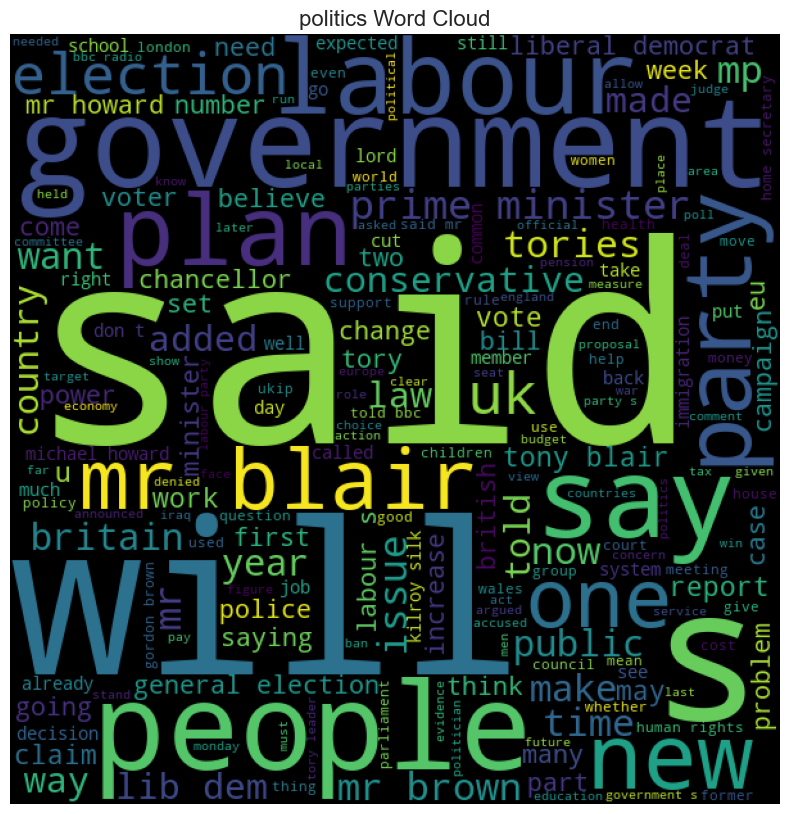

In [22]:
# Words cloud for each news category
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
category_list = df['category'].unique()
for category in category_list:
    Text = ' '.join([sentence for sentence in df.loc[df['category'] == category,'text']])
    wordcloud = WordCloud(width = 600, height = 600).generate(Text)
    words_cloud(wordcloud, category)

In [23]:
# Data cleaning and preprocessing
# Download NLTK stopwords
#nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['cleaned_news'] = df['text'].apply(clean_text)

In [24]:
df

,category,text,label,text_length,text_word_count,cleaned_news
0,tech,tv future in the hands of viewers with home th...,3,4333,737,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,1842,300,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,0,1342,246,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,0,2176,341,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,4,1579,260,ocean twelv raid box offic ocean twelv crime c...
...,...,...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1,1745,293,car pull us retail figur us retail sale fell j...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,2,955,156,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announce new glasgow concert us band rem h...,4,1648,301,rem announc new glasgow concert us band rem an...
2223,politics,how political squabbles snowball it s become c...,2,4684,858,polit squabbl snowbal becom commonplac argu bl...


In [25]:
df.to_csv('cleaned_news_dataset.csv')

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_news'],df['label'],test_size=0.2,random_state=42)

In [27]:
# Vectorization using TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    #SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    #GaussianNB(),
    ComplementNB(),
    MultinomialNB(),
    BernoulliNB(),
    XGBClassifier()
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_tfidf)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred_tfidf))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred_tfidf))
    print("="*50)

RandomForestClassifier Accuracy: 0.9507042253521126
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       0.89      0.96      0.92        96
           2       0.98      0.96      0.97        83
           3       0.94      0.83      0.88        70
           4       0.94      0.97      0.96        68

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426

Confusion Matrix for RandomForestClassifier:
[[109   0   0   0   0]
 [  0  92   1   3   0]
 [  0   2  80   0   1]
 [  0   8   1  58   3]
 [  0   1   0   1  66]]
AdaBoostClassifier Accuracy: 0.7582159624413145
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       109
           1       0.57      0.71      0.63  

In [29]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_tfidf)
    report = classification_report(y_test, y_pred_tfidf, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.960094,0.959803,0.961151,0.960094
1,AdaBoostClassifier,0.758216,0.758773,0.788363,0.758216
2,GradientBoostingClassifier,0.950704,0.950397,0.950777,0.950704
3,LogisticRegression,0.971831,0.971726,0.972223,0.971831
4,KNeighborsClassifier,0.943662,0.943419,0.943850,0.943662
5,DecisionTreeClassifier,0.814554,0.813921,0.814729,0.814554
6,ComplementNB,0.974178,0.974109,0.974224,0.974178
7,MultinomialNB,0.964789,0.964691,0.965475,0.964789
8,BernoulliNB,0.948357,0.947781,0.951490,0.948357
9,XGBClassifier,0.943662,0.943567,0.944179,0.943662


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
lg_classifier = LogisticRegression()

# Train the RandomForestClassifier
lg_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_lg = lg_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(" Logistic Regression Accuracy:", accuracy_lg)

# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lg))

# Confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lg))

 Logistic Regression Accuracy: 0.971830985915493
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       0.96      0.98      0.97        96
           2       0.96      0.95      0.96        83
           3       1.00      0.93      0.96        70
           4       0.96      0.99      0.97        68

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426

Confusion Matrix for Logistic Regression:
[[109   0   0   0   0]
 [  0  94   1   0   1]
 [  1   2  79   0   1]
 [  1   2   1  65   1]
 [  0   0   1   0  67]]


In [31]:
def prediction(comment):
    preprocessed_comment = clean_text(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf_vectorizer.transform(comment_list)
    prediction = lg_classifier.predict(comment_vector)[0]
    return prediction
prediction = prediction('mobile games come of age the bbc news website takes a look at how games on mobile phones are maturing. a brief round-up follows but you can skip straight to the reviews by clicking on the links below.  if you think of snake when some mentions  mobile games  then you could be in for a bit of a surprise. this is because mobile games have come a long way in a very short time. even before nokia s n-gage game phone launched in late 2003  many mobile operators were realising that there was an audience looking for something to play on their handset.  and given that many more people own handsets than own portable game playing gadgets such as the gameboy it could be a very lucrative market. that audience includes commuters wanting something to fill their time on the way home  game fans looking for a bit of variety and hard core gamers who like to play every moment they can. life for all these types of player has got immeasurably better in the last year as the numbers of titles you can download to your phone has snowballed. now sites such as wireless gaming review list more than 200 different titles for some uk networks and the ranges suit every possible taste. there are ports of pc and arcade classics such as space invaders  lunar lander and bejewelled. there are also versions of titles  such as colin mcrae rally  that you typically find on pcs and consoles.  there are shoot-em-ups  adventure games  strategy titles and many novel games only found on handsets. rarely now does an action movie launch without a mobile game tie-in. increasingly such launches are all part of the promotional campaign for a film  understandable when you realise that a good game can rack up millions of downloads. the returns can be pretty good when you consider that some games cost Â£5. what has also helped games on mobiles thrive is the fact that it is easier than ever to get hold of them thanks to technology known as wap push. by sending a text message to a game maker you can have the title downloaded to your handset. far better than having to navigate through the menus of most mobile operator portals. the number of handsets that can play games has grown hugely too. almost half of all phones now have java onboard meaning that they can play the increasingly sophisticated games that are available - even the ones that use 3d graphics.  the minimum technology specifications that phones should adhere to are getting more sophisticated which means that games are too. now double key presses are possible making familiar tactics such as moving and strafing a real option. the processing power on handsets means that physics on mobile games is getting more convincing and the graphics are improving too. some game makers are also starting to take advantage of the extra capabilities in a mobile. many titles  particularly racing games  let you upload your best time to see how you compare to others. usually you can get hold of their best time and race against a  ghost  or  shadow  to see if you can beat them. a few games also let you take on people in real time via the network or  if you are sitting close to them  via bluetooth short-range radio technology. with so much going on it is hard to do justice to the sheer diversity of what is happening. but these two features should help point you in the direction of the game makers and give you an idea of where to look and how to get playing.   too fast too furious (digital bridges)   as soon as i start playing this i remember why i never play driving games - because i m rubbish at them. no matter if i drive the car via joystick or keypad i just cannot get the hang of braking for corners or timing a rush to pass other drivers. the game rewards replay because to advance you have to complete every section within a time limit. winning gives you cash for upgrades. graphically the rolling road is a convincing enough evocation of speed as the palm trees and cactus whip by and the city scrolls past in the background. the cars handle pretty well despite my uselessness but it was not clear if the different models of cars were appreciably different on the track. the only niggle was that the interface was a bit confusing especially when using a joystick rather than the keypad to play.   fatal force (macrospace)   a futuristic shooter that lets you either play various deathmatch modes against your phone or run through a series of scenarios that involves killing aliens invading earth. graphics are a bit cartoon-like but only helps to make clear what is going on and levels are well laid out and encourage you to leap about exploring. both background music and sounds effects work well. the scenarios are well scripted and you regularly get hints from the fatal force commanders. weapons include flamethrowers  rocket launchers  grenades and at a couple of points you even get chance to use a mech for a short while. with the right power-up you can go into a matrix-style bullet time to cope with the onslaught of aliens. the game lets you play via bluetooth if others are in range. online the game has quite a following with clans  player rankings and even new downloadable maps')

In [32]:
if prediction == 0:
    print("sport")
elif prediction == 1:
    print("business")
elif prediction == 2:
    print('politics')
elif prediction == 3:
    print('tech')
else:
    print("entertainment")

tech


In [ ]:
#{'sport':0, 'business':1, 'politics':2, 'tech':3, 'entertainment':4}

In [33]:
import pickle
pickle.dump(lg_classifier,open('lg_classifier.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer.pkl','wb'))